<a href="https://murmuration-sas.com/" target="_blank">
    <img src="https://murmuration-sas.com/wp-content/uploads/2017/05/Logo-murmuration-vert.png" alt="Murmuration" style="width: 100px" align="right" />
</a>

# Urbanisation
____________

<p style="text-align: right"> Tutorial created by - Murugesh Manthiramoorthi</p>

## Synopsis

[1. Data description](#data_description) <br>
[2. Dependencies](#dependencies) <br>
[3. Import required libraries](#import_libraries) <br>
[4. Open and view zarr](#open_zarr) <br>
[5. Plot map](#plot_map) <br>
[6. Save externally as geoTIF](#save_as_geotiff) <br>
[7. Masking xarrays](#masking_xarrays) <br>
[8. Convert xarray to pandas dataframe](#convert_to_df) <br>
[9. Sources](#sources) <br>

## <a id='data_description'></a>1. Data description

- The data consists of a imperviousness value representing the urbanisation level in a region. 
- The value ranges between 0 and 100 indicating the scale of urbanisation. 
- A value of 0 represents that the zone has no urbanisation. 
- A value of 100 represent complete urbanisation. 
- Urbanisation data is available for the years 2006, 2009, 2012, 2015 and 2018
- For the years between 2006 and 2015, 
    - Data is available at a spatial resolution of 20m
    - Data for France is available in four zarr files - southwest, southeast, northwest, northeast
    - Data is present in the projection EPSG:4326
- For the year 2018,
    - Data is available at a spatial resolution of 10m
    - Data is available in a single zarr file
    - Data ispresent in the projection EPSG:3035

## <a id='dependencies'></a>2. Dependencies

The following packages are required to run the scripts below.

- rioxarray
- xarray
- fsspec
- Pandas

## <a id='import_libraries'></a>3. Import required libraries

In [ ]:
import os
from glob import glob
import rioxarray
import xarray as xr
import datetime

import fsspec
import warnings
warnings.filterwarnings('ignore')

## <a id='open_zarr'></a>4. Open and view zarr

Select the endpoint for the zarr file and open it using the folowing snippet. Then print the dataset to view the structure of the data. 

The available repositories are:
- France_northeast_2006.zarr
- France_northwest_2006.zarr
- France_southeast_2006.zarr
- France_southwest_2006.zarr
- France_northeast_2009.zarr
- France_northwest_2009.zarr
- France_southeast_2009.zarr
- France_southwest_2009.zarr
- France_northeast_2012.zarr
- France_northwest_2012.zarr
- France_southeast_2012.zarr
- France_southwest_2012.zarr
- France_northeast_2015.zarr
- France_northwest_2015.zarr
- France_southeast_2015.zarr
- France_southwest_2015.zarr
- France_entier_2018.zarr

In [ ]:
repo = "France_southwest_2015.zarr"
url = "https://storage.gra.cloud.ovh.net/v1/AUTH_0c2c27fc2c8b4a7d97a35ea0e2911f9b/murmuration-cassini/urbanisation/" + repo
mapper = fsspec.get_mapper(url) 

In [ ]:
ds = xr.open_zarr(mapper)
ds

## <a id='plot_map'></a>5. Plot map

Select a small region of study to view it in a map. Selection of a small zone is very important as the size of the dataset is very large and it cannot be read in memory. 

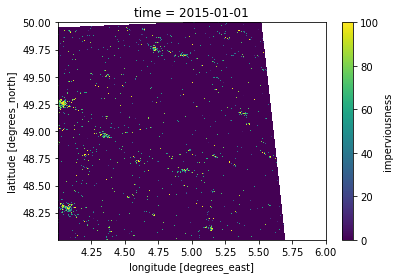

In [4]:
ds.sel(latitude = slice(50, 48), longitude = slice(4, 6))["imperviousness"].plot()

## <a id='save_as_geotiff'></a>6. Save externally as geoTIF

The whole data or a part of it can be saved externally into a raster file (geoTIF) to use it in other applications like QGIS, ArcGIS etc. Since here the data is very huge, a part of it has to be selected before saving it tro a geoTIF file. 

In [ ]:
ds_to_save = ds.sel(latitude = slice(50, 48), longitude = slice(4, 6))["imperviousness"]

In [ ]:
ds_to_save

In [ ]:
ds_to_save.rio.to_raster("ds_to_save.tif")

## <a id='masking_xarrays'></a>7. Masking xarrays

Create a mask using where function to replace the value with nan where the condition fails. Use the argument drop to drop those entries

In [ ]:
ds_masked = ds.where((ds.latitude < 48.5) & (ds.latitude > 48) & (ds.longitude < 4.25) & (ds.longitude > 4), drop=True)

In [ ]:
ds_masked

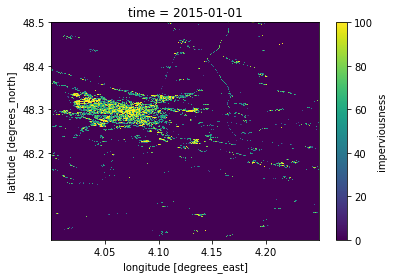

In [10]:
ds_masked["imperviousness"].plot()

## <a id='convert_to_df'></a>8. Convert xarray to pandas dataframe

Since some of the conputations and charts requires the data to be in a dataframe format, a part or whole of the data can be converted to a daraframe using the following code snippets. 

In [ ]:
ds_to_df = ds_masked.to_dataframe()
ds_to_df = ds_to_df.reset_index()

In [12]:
ds_to_df.head()

time  latitude  longitude  imperviousness  spatial_ref
0 2015-01-01  48.49992   4.000216             0.0          0.0
1 2015-01-01  48.49992   4.000445             0.0          0.0
2 2015-01-01  48.49992   4.000675             0.0          0.0
3 2015-01-01  48.49992   4.000904             0.0          0.0
4 2015-01-01  48.49992   4.001133             0.0          0.0

## <a id='sources'></a>9. Sources

- https://docs.xarray.dev/en/stable/index.html
- https://land.copernicus.eu/pan-european/high-resolution-layers/imperviousness/status-maps